In [20]:
from docscorer.configuration import ScorerConfiguration
from docscorer.docscorer import DocumentScorer
import json
import pandas as pd
config = ScorerConfiguration()
scorer = DocumentScorer(config)
import os

In [21]:
path = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/eng_Latn/eng_Latn.sample.jsonl"
documents = []
with open(path, "r", encoding="utf8") as a:
    for document in a:
        documents.append(json.loads(document))

In [14]:


agrupations = {"ary_arab": "ara_arab", "ars_arab":"ara_arab", "acm_arab": "ara_arab", "acm_arab": "ara_arab", "acq_arab":"ara_arab", "aeb_arab":"ara_arab", "apc_arab":"ara_arab", "arb_arab":"ara_arab",
               "ars_arab":"ara_arab", "ary_arab":"ara_arab", "arz_arab":"ara_arab", "arb_arab": "ara_arab",
              "pes_arab": "fas_arab", "prs_arab" : "fas_arab",
              "hrv_latn": "hbs_latn", "bos_latn": "hbs_latn",
               "cmn_hant": "cmn_hans"
              }

path = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples"
for x in os.listdir(path):
    rel_path = os.path.join(path, x)
    save_path = rel_path
    rel_path = os.path.join(rel_path, os.listdir(rel_path)[0])
    rel_path = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/pan_Guru/pan_Guru.sample.jsonl"
    save_path = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/pan_Guru/"
    documents = []
    with open(rel_path, "r", encoding="utf8") as a:
        for document in a:
            documents.append(json.loads(document))
    
    language = rel_path[-21:-18]
    script = rel_path[-17:-13]
    script = "hans" if script == "Hant" else script.lower()
    
    df = pd.DataFrame(columns=["id", "results", "text", "language", "old_score", "old_results"])
    for document in documents:
        if language in ["ara", "fas", "hbs", "cmn"]:
            document["seg_langs"] = [agrupations[x.lower()] if x.lower() in agrupations else x for x in document["seg_langs"]]
        
        result = scorer.score_document(ref_lang=language, ref_script=script, lang_segments=document["seg_langs"], document_text=document["text"], doc_id=document["id"], raw_score=False)
        df.loc[df.shape[0]] = [document["id"], result, document["text"], result[2], document["doc_scores"][0]/10, [x/10 for x in document["doc_scores"]]]

    df["WDS"] = df.apply(lambda x: f"{round(x['results'][0], 2)}/{round(x['old_results'][0], 2)}", axis=1)
    df["language"] = df.apply(lambda x: f"{float(round(x['results'][1], 2))}/{float(round(x['old_results'][1], 2))}", axis=1)
    df["urls"] = df.apply(lambda x: f"{float(round(x['results'][2], 2))}/{float(round(x['old_results'][2], 2))}", axis=1)
    df["punct"] = df.apply(lambda x: f"{float(round(x['results'][3], 2))}/{float(round(x['old_results'][3], 2))}", axis=1)
    df["sing_chars"] = df.apply(lambda x: f"{float(round(x['results'][4], 2))}/{float(round(x['old_results'][4], 2))}", axis=1)
    df["numbers"] = df.apply(lambda x: f"{float(round(x['results'][5], 2))}/{float(round(x['old_results'][5], 2))}", axis=1)
    df["repet_seg"] = df.apply(lambda x: f"{float(round(x['results'][6], 2))}/{float(round(x['old_results'][6], 2))}", axis=1)
    df["many_long"] = df.apply(lambda x: f"{float(round(x['results'][7], 2))}/{float(round(x['old_results'][7], 2))}", axis=1)
    df["very_long"] = df.apply(lambda x: f"{float(round(x['results'][8], 2))}/{float(round(x['old_results'][8], 2))}", axis=1)
    df["compression"] = df.apply(lambda x: f"{float(round(x['results'][9], 2))}/{float(round(x['old_results'][9], 2))}", axis=1)
    df["short_seg"] = df.apply(lambda x: f"{float(round(x['results'][10], 2))}/NaN", axis=1)
    df["text"] = df.text.apply(lambda x: x.replace("\n", "\\n"))
    df[['id', 'WDS', 'language', 'urls', 'punct', 'sing_chars', 'numbers', 'repet_seg', 'many_long',
        'very_long', 'compression', 'short_seg', 'text'
       ]].to_csv(os.path.join(save_path, f"{language}_{script}.tsv"), sep="\t",index=False)
        

    print(save_path)
    break

/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/pan_Guru/


In [7]:
config.SCRIPTS

array(['latn', 'arab', 'cyrl', 'beng', 'grek', 'gujr', 'hebr', 'deva',
       'armn', 'jpan', 'knda', 'geor', 'hang', 'mlym', 'mymr', 'guru',
       'sinh', 'taml', 'telu', 'thai', 'hans'], dtype=object)

In [24]:
(1*0.8)*0.32*0.92

0.23552

In [24]:
agrupations = {"ary_arab": "ara_arab", "ars_arab":"ara_arab", "acm_arab": "ara_arab", "acm_arab": "ara_arab", "acq_arab":"ara_arab", "aeb_arab":"ara_arab", "apc_arab":"ara_arab", "arb_arab":"ara_arab",
               "ars_arab":"ara_arab", "ary_arab":"ara_arab", "arz_arab":"ara_arab", "arb_arab": "ara_arab",
              "pes_arab": "fas_arab", "prs_arab" : "fas_arab",
              "hrv_latn": "hbs_latn", "bos_latn": "hbs_latn",
                "cmn_hans": "zho_hans",
               "cmn_hant": "zho_hant",
                "ekk_latn": "est_latn",
                "fil_latn": "tlg_latn",
                "gug_latn": "grn_latn",
                "ktu_latn": "kon_latn"
              }

document = documents[18]
language = "zho"
script = "hant"
document["seg_langs"] = [agrupations[x.lower()] if x.lower() in agrupations else x for x in document["seg_langs"]]
scorer.score_document(ref_lang=language, ref_script=script, lang_segments=document["seg_langs"], document_text=document["text"], doc_id=document["id"], raw_score=False)

[np.float64(0.40147290211305015),
 0.7,
 1.0,
 np.float64(0.7),
 1.0,
 1.0,
 1.0,
 0.1,
 0.0,
 1.0,
 0.95]

In [26]:
for i in range(len(feat["punctuation_chars"])):
    print(feat["punctuation_chars"][i])
    print(x["text"].split("\n")[i])
    

2
更新时间：2018-11-21
1
优势测量稳定可靠，受介质和过程条件变化的影响HistoROM集成据存储单元，帮助快速调试、维修和诊断
1
适用于固料物位测量的经济、高效的基本型仪表
8
Micropilot FMR56为固料贮仓或货柜等轻型工况条件下的物位测量而设计。Micropilot适合粉状、粒状等固体散料的连续、非接触式的物位测量。测量值受粉尘、进料噪音、温度变化、气相介质的影响。
0
优势
0
测量稳定可靠，受介质和过程条件变化的影响
1
HistoROM集成据存储单元，帮助快速调试、维修和诊断
0
测量可靠性高，基于多回波追踪计算，即使仓内存在障碍物依然能够准确测量
0
硬件和软件开发过程符合IEC 61508标准，单台仪表满足SIL2， 同构冗余条件下达SIL3
0
无缝集成到控制或设备管理系统
0
直观的菜单引导式操作（在线或通过控制系统）
0
通过世界的SIL和WHG实验认证，节约您的时间和经济成本
0
应用领域
1
PP镀层的喇叭天线，可通过安装支架或密封转盘，轻松对准固体表面。
0
过程连接：安装支架或松套法兰
4
温度范围：-40+80°C (-40+176°F)
6
压力范围：-13bar (-14.543.5psi)
1
大测量范围：30m（98ft)
1
K波段: 26GHz
2
际防爆认证, 5-point线性协议


In [24]:
feat

{'word_chars': [5,
  49,
  20,
  91,
  2,
  20,
  27,
  34,
  38,
  14,
  21,
  28,
  4,
  31,
  14,
  7,
  11,
  10,
  6,
  14],
 'punctuation_chars': [2,
  1,
  1,
  8,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  4,
  6,
  1,
  1,
  2],
 'singular_chars': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0],
 'numbers': [8, 0, 0, 2, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 9, 8, 4, 2, 1]}

In [30]:
i = 0
for x in documents:
    if x["id"] == "9defa3841932d33b28054a2b51185860":
        print(x)
        print(x["text"])
        print(x["seg_langs"])
        print(i)
        break
    i+=1

{'f': './WIDE-20150606200032-crawl424/WIDE-20150606213312-12925.warc.gz', 'o': 256506823, 's': 3794, 'rs': 10924, 'u': 'http://socialvideocam.com/p/946107213989894625_1721659949', 'c': 'text/html', 'ts': '2015-06-06T21:56:35Z', 'de': 'windows-1252', 'crawl_id': 'wide12', 'lang': ['eng_Latn', 'ind_Latn', 'ita_Latn'], 'prob': [0.9197, 0.0109, 0.0094], 'text': '11, 0\n#Travel #Motivation #lovelife #livelifetothefull #Travelgram #Livelovelearn #Happiness #Onelifeoneshot #lifeiswonderful', 'xml': '<doc fingerprint="9d4d5597eb477eb2">\n  <main>\n    <div>\n      <p> 11, 0 </p>\n      <div>\n        <p>#Travel #Motivation #lovelife #livelifetothefull #Travelgram #Livelovelearn #Happiness #Onelifeoneshot #lifeiswonderful</p>\n      </div>\n    </div>\n  </main>\n  <comments/>\n</doc>', 'cluster_size': 1, 'seg_langs': ['unk', 'eng_Latn'], 'id': '9defa3841932d33b28054a2b51185860', 'filter': 'length_500', 'pii': [], 'doc_scores': [2.9, 10.0, 10, 9.3, 5.4, 9.4, 10.0, 0.0, 0.0, 6.9], 'web-register'

In [28]:
x = {"id":9568232,"scores":[0.616,0.375,0.339,0.506,0.471,0.776,0.375,0.339,0.506,0.471,0.776,0.417,0.145,0.54,0.805,0.0,0.808,0.91,0.489,0.872,0.879,0.711,0.835,0.817,0.0,0.0,0.0,0.0,0.0,0.834,0.879,0.859,0.871,0.0,0.0,0.0,0.0,0.804,0.516,0.833,0.906,0.973,0.929,0.85,0.805,0.873,0.908,0.947,0.853,0.0,0.815,0.74,0.556,0.823,0.954,0.0,0.882,0.934,0.906,0.869,0.938,0.839,0.618,0.74,0.525,0.84,0.564,0.726,0.639,0.84,0.952,0.877,0.618,0.74,0.727,0.3,0.543,0.636,0.67,0.522,0.676,0.676,0.722,0.759,0.649,0.575,0.651,0.783,0.757,0.764,0.765,0.733,0.736,0.68,0.728,0.811,0.784,0.793,0.864,0.776,0.699,0.787,0.751,0.666,0.811,0.747,0.836,0.81,0.814,0.727,0.8,0.782,0.794,0.693,0.836,0.846,0.819,0.831,0.897,0.824,0.765,0.816,0.542,0.173,0.8],"seg_langs":["ita_Latn","eng_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","eng_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","eng_Latn","eng_Latn","ita_Latn","ita_Latn","zho_Hans","ita_Latn","ita_Latn","spa_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","zho_Hans","zho_Hans","zho_Hans","zho_Hans","khm_khmr","ita_Latn","ita_Latn","ita_Latn","ita_Latn","zho_Hans","zho_Hans","zho_Hans","zho_Hans","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","khm_khmr","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","eng_Latn","eng_Latn","ita_Latn","ita_Latn","ita_Latn","fra_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","fra_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","fra_Latn","ita_Latn","ita_Latn","ita_Latn","ita_Latn","nld_Latn","ita_Latn","eng_Latn","ita_Latn"],"text":"Blog di Cinese Facile - Cinese Facile 2.0 di Lilo Wong\nHome\nBLOG CINESE FACILE\nBLOG SPECIALE CANTONESE\nCONTATTI\nGrammatica, livello avanzato\nHome\nBLOG CINESE FACILE\nBLOG SPECIALE CANTONESE\nCONTATTI\nGrammatica, livello avanzato\nSearch by typing & pressing enter\nYOUR CART\n12/11/2017 Commenti\n5 minuti di cinese: Sei sicuro di saper usare correttamente la frase con 把?\n把bǎ\nTenere in mano\nLa logica dell'evoluzione dell'uso delle parole è chiara. Dall'azione, al descrivere l'oggetto dell'azione indicando la quantità, all'uso come preposizione nella costruzione della frase, questo è proprio il caso della parola 把bǎ.\nConosci la frase con 把bǎ?\nI cinesi usano molto spesso un modo di espressione che alle persone non di madrelingua cinese si meravigliano, ed è “frase con 把”.\nFacciamo qualche domanda. La prima:\nPerché si usa la frase con 把?\nPrima di tutto, capiamo che “L’uso della frase con 把 è una preferenza e non un obbligo”. In altre parole, usare la frase con 把 deve essere una cosa spontanea come allacciare le scarpe, altrimenti, usi altre costruzioni di frase CORRETTE per esprimerti nel modo giusto e basta.\nPerché dico così? Perché infondo, anche i tuoi insegnanti ti fanno fare un tipo di esercizi con questo quesito: riscrivi le seguenti frasi in frase con 把. Vediamo gli esempi:\n我吃面包了.\n书我放在桌子上了.\n我翻译这个句子了,翻译成中文了.\n虽然我们没有见过面,但我当他是朋友.\n​\nMa avrai notato che i cinesi usano molto spesso la frase con 把, e se vuoi far vedere che sai bene il cinese, non puoi esimerti da questo uso!!!\nTutto qui, questione di scelta... Io se dovessi studiare il cinese, vorrei parlare come un cinese (sembra facile...).\nGli errori più frequenti per i non cinesi madrelingua li conosci?\nVediamo le seguenti frasi:\n他把这件事情知道了.\n我能把你的词典用一下吗?\n你把这个作业没给老师.\n请把我妈妈告诉给我打电话.\nQuando trovi gli errori, trovi il sapere!\nPer sapere 把 conviene sapere 被\n​In modo da usare appropriatamente la frase con 把, oggi si arriva alla conclusione che l’apprendimento è più efficace se viene abbinato all’uso della frase passiva con 被 bèi. Infatti, i due argomenti si trovano sulle pagine 363-371 del libro “Cinese Facile, libro di grammatica. Come usare le parole per comunicare nel modo giusto”.\nPer semplificare la tua vita nel percorso dell’apprendimento del cinese, ti faccio notare che i cinesi usare la frase con 把 nelle seguenti situazioni:\nPer indicare il mezzo per raggiungere un obiettivo. In genere, per rispondere a questi tipi di domanda:\nCosa fai se... (per risolvere il problema di una situazione)?\nCosa fai per… (per non ricorrere a un errore)?\nCosa fai visto che … (per raggiungere un obiettivo)?\nPer indicare la gestione o la sistemazione di una persona o di una cosa. La frase con 把 è usata per rispondere:\nDove disporre una persona o una cosa (collocazione spaziale come conseguenza dell’azione)?\nCome disporre una persona o una cosa (disposizione con la modalità espressa dall’azione come conseguenza)\nTi interessa saperne di più? Continua a seguirmi, e fai le tue domande che non credo che non ci siano… Se invece hai uno dei libri di Cinese Facile, iscriviti al gruppo chiuso su FB, che ti seguirò personalmente.\n​\nNon ti fermare, mai!\nCommenti\n10/11/2017 Commenti\n5 minuti di cinese: non è difficile dire \"papà\" in cinese, neanche usarlo nella forma scritta\nUna delle due parole universalmente simile:\n爸 bà - papà\nIl mio cagnolino non dice le parole anche se esprime i suoi sentimenti a modo suo con i suoni diversi, e spesso intuibili da chi vive vicino a lui.\nL'uomo comunica con un linguaggio verbale, grazie ai mutamenti strutturali della cavità orale, ed essere umano riesce a comunicare emettendo suoni quali diventati le varie lingue del mondo.\nIn qualche modo la lingua parlata dei popoli sembra aver suoni simili in certe parole, tra cui quella di mamma e di papà.\nLa forma scritta del linguaggio è un po' più complicato. Tu usi le 21 lettere e riesci a esprimerti totalmente con la lingua italiana. Nella lingua cinese è già più complicato l'apprendimento e l'utilizzo dei simboli chiamati 汉字Hànzì quale forma grafica dell'espressione del linguaggio orale.\nQuesto è il motivo che ti presento questa serie di elaborati, con i video e gli articoli per farti capire meglio e per convincerti che basta un po' di volontà, riesci anche tu a imparare il cinese nel modo efficace.\nLeggi la breve spiegazione e guarda il video..., poi dimmi se ti piace!\nLeggi altro\nCommenti\n9/11/2017 Commenti\n5 minuti di cinese: sai cosa significa per un cinese il numero 8?\nOtto, si pronuncia bā\nSi scrive in carattere cinese 八\nanche in numero arabo con 8\nAvrai sentito dire che ai cinesi piace il numero 8. Ti hanno anche detto che l'origine di questo sentimento è dovuto alla pronuncia del numero 8 che assomiglia alla parola \"arricchirsi\", \"aver tanti soldi\", detta fā, e scritta con il carattere 发.\nVuoi conoscere tutte le curiosità di questo numero nella tradizione cinese?\nLeggi l'articolo con il quale ti presento le varie sfumature di 八, e alla fine puoi anche guardare il breve video che ti spiega le caratteristiche della parola \"otto\".\nLeggi altro\nCommenti\nAutrice di Cinese Facile\nLilo M. Y. Wong\nArchives\nGennaio 2022\nGiugno 2021\nMarzo 2021\nNovembre 2020\nOttobre 2020\nGennaio 2020\nSettembre 2019\nAprile 2019\nMarzo 2019\nGennaio 2019\nDicembre 2018\nNovembre 2018\nOttobre 2018\nGiugno 2018\nMaggio 2018\nAprile 2018\nMarzo 2018\nGennaio 2018\nDicembre 2017\nNovembre 2017\nOttobre 2017\nSettembre 2017\nAgosto 2017\nLuglio 2017\nGiugno 2017\nAprile 2017\nMarzo 2017\nFebbraio 2017\nGennaio 2017\nDicembre 2016\nNovembre 2016\nAgosto 2016\nLuglio 2016\nGiugno 2016\nMaggio 2016\nAprile 2016\nMarzo 2016\nFebbraio 2016\nDicembre 2015\nNovembre 2015\nOttobre 2015\nSettembre 2015\nAgosto 2015\nLuglio 2015\nCategorie\nTutto 5 Minuti Di Cinese 8 A AI AN Anch'io Anno Della Tigre Approfondimenti Grammaticali Approfondimento B BA BAI BAN BANG BAO BEI BEN BI BIAN BIAO Bie BU C CA CAI Calendario Cinese CAN Capodanno Cinese Cinese Facile Cinese Facile Di Lilo Wong Cinese Parlato Come Pronunciare Il Nome Del Presidente Cinese Come Usare Il Cinese Conoscere Il Cinese Conoscere Le Tecniche Convenevoli Cristianesimo Cultura Cinese Curiosità Tra La Lingua E La Cultura Curiosità Tra La Lingua E La Cultura Dire: Aver Vinto F Feste Cinesi Frase Con 把 Frase Di Esistenza Gli Avverbi Sempre Grammatica Cinese HSK Il Cinese E La Cina Il Cinese Parlato Il Cinese Scritto I Localizzatori Il Popolo Cinese Il Primo Giorno Di Scuola Il Sei Tipi Di Tè Cinese Il Sistema Di Scrittura Del Cinese Indovinare I Punti Cardinali I Quattro Toni Le Etnie Di Minoranza Cinesi Le Festività Cinesi Le Parole Cinesi Le Quattro Invenzioni Cinesi Libri Cinese Facile Libri Di Lilo Wong Libro Esercizi Grammatica Lingua Cinese Memi Modi Di Parlare Morfema Nome E Cognome Non Fare Questi Errori Omofonia Omografia Omonimia Oroscopo Cinese Parole Utili Particella Modale Pasqua PEI Pensiero Cinese Poesia Preposizione Pronuncia Cinese Putonghua Qingming Qualcosa Di Cultura Ridere Per Imparare Risultati Del Cinese Facile Saluto Settimana Santa 圣周 Sintagma Appositivo Studio Del Cinese Suggerimenti Per Lo Studio Tiangan Verbo Di Esistenza Verso Video Vocaboli Zhonghua Minzu 一定,肯定,确定 也 了 以前 以后 保 再 也 包 北 呢 在 复活节 天主教 La Chiesa Cattolica 往,向,朝 才 报 抱 按 方便 星 本 杯 的时候 矮 笨 被 重阳\nFeed RSS\nFornito da Crea il tuo sito web unico con modelli personalizzabili. Inizia","url":"https://www.cinesefacile.com/blog-cinese-facile/category/ba","collection":"cc40"}

In [23]:
feat = scorer._extract_features(document_text=x["text"])

In [29]:
scorer.score_document(ref_lang="ita", ref_script="latn", lang_segments=x["seg_langs"], document_text=x["text"], doc_id=x["id"], raw_score=False)

[0.77, 0.99, 1.0, 1.0, 1.0, 0.92, 0.89, 0.4, 1.0, 1.0, 0.84]

In [17]:
from typing import Any
def get_threshold(
    table: dict[str, Any], language: str, default_key: str = "standard"
) -> Any:
    """Fetch a language-specific threshold, falling back to `default_key`."""
    try:
        script = language.split("_")[1]
        if language in table:
            return table[language]
        elif script in table:
            return table[script]
        else:
            return table[default_key]
    except KeyError:
        raise KeyError(
            f"Neither '{language}' nor default '{default_key}' found in {table}."
        ) from None
ref_language = "hye_armn"
menu_length = get_threshold(config.MENUS_AVERAGE_LENGTH, ref_language)
correct_lang_chars = 0
wrong_lang_chars = 0
available_chars = False
lang_segments = [x.lower() for x in x["seg_langs"]]
word_chars = feat["word_chars"]
for n in range(len(lang_segments)):
    if word_chars[n] <= menu_length:
        available_chars = True
        continue
    elif lang_segments[n] == ref_language:
        correct_lang_chars += word_chars[n]
    else:
        wrong_lang_chars += word_chars[n]
if correct_lang_chars == 0:
    if not available_chars:
        # print(
        #     f"Doc_name: '{id}' - No available segments have been found on "
        #     "the target language\n"
        #     f"- Language: '{ref_language}' - Segment_languages: "
        #     f"{set(lang_segments)}"
        # )
        print("no chars")

    else:
        if all([x == ref_language for x in lang_segments]):
            print(1)
        # print(
        #     f"Doc_name: '{id}' - "
        #     "Only too short segments have been found on the target language"
        # )
        print("solo cortos")
results = correct_lang_chars / (correct_lang_chars + wrong_lang_chars)
print( min(results, 1.0))

no chars
0.0


In [13]:
menu_length

26

In [18]:
def scale_value(
    value: float,
    min_value: float,
    max_value: float,
    min_score: float,
    max_score: float,
) -> float:
    """Scale a value linearly into a score range."""
    if min_value == max_value:
        return 0.0

    ratio = (value - min_value) / (max_value - min_value)
    score = ratio * (max_score - min_score) + min_score
    return score
    
class PunctScorer:
    MAX_SCORE = 1.0
    MIN_SCORE = 0.0

    def __init__(self, config: ScorerConfiguration):
        self.config = config
    
    def penalize_lack_punct_segm(self, punct_chars: list, word_chars: list, num_word_chars: int, not_penalized: float, percent_bad: float) -> float:
        bad_segm = 0
        for n in range(len(punct_chars)):
            n_word_seg = word_chars[n]
            n_punct_seg = punct_chars[n]
            if not n_word_seg or n_word_seg <= not_penalized:
                continue
            ratio = round((n_punct_seg / n_word_seg) * 100, 1)
            if ratio < percent_bad:
                print(n)
                bad_segm += n_word_seg
        proportion_bad = bad_segm/num_word_chars
        print("bad_Seg",bad_segm)
        print("total",num_word_chars)
        print("proporcion",proportion_bad)
        if proportion_bad < 0.05:
            return 1
        elif proportion_bad > 0.4:
            return 0
        elif proportion_bad > 0.05 and proportion_bad < 0.2:
            return scale_value(proportion_bad, 0.2, 0.05, 0.6, 1.0)
        else:
            return scale_value(proportion_bad, 0.4, 0.2, 0, 0.6)
    
    def score(
        self, ref_language: str, num_punctuation_chars: int, num_word_chars: int, punct_chars: list, 
        word_chars: list) -> float:
        if not num_word_chars or len(punct_chars) != len(word_chars):
            return 0.0
    
        percent_max = get_threshold(self.config.PUNCTUATION_PERCENT_MAX, ref_language)
        percent_bad = get_threshold(self.config.PUNCTUATION_PERCENT_BAD, ref_language)
        percent_semibad = get_threshold(
            self.config.PUNCTUATION_PERCENT_SEMIBAD, ref_language
        )
        percent_desired_max = get_threshold(
            self.config.PUNCTUATION_PERCENT_DESIRED_MAX, ref_language
        )
        percent_desired_min = get_threshold(
            self.config.PUNCTUATION_PERCENT_DESIRED_MIN, ref_language
        )
    
        ratio = round((num_punctuation_chars / num_word_chars) * 100, 1)
        
        score = 0.0
        if percent_desired_min <= ratio <= percent_desired_max:
            score = self.MAX_SCORE
        elif ratio >= percent_bad[0]:
            ratio = min(ratio, percent_max)
            score = scale_value(ratio, percent_max, percent_bad[0], self.MIN_SCORE, 0.5)
        elif ratio >= percent_semibad[0]:
            score = scale_value(ratio, percent_bad[0], percent_semibad[0], 0.5, 0.7)
        elif ratio > percent_desired_max:
            score = scale_value(
                ratio, percent_semibad[0], percent_desired_max, 0.7, self.MAX_SCORE
            )
        elif ratio >= percent_semibad[1]:
            score = scale_value(
                ratio, percent_semibad[1], percent_desired_min, 0.5, self.MAX_SCORE
            )
        else:
            score = scale_value(ratio, 0.0, percent_semibad[1], self.MIN_SCORE, 0.5)
    
        if score < 0.3:
            return score
        menu_length = get_threshold(self.config.MENUS_AVERAGE_LENGTH, ref_language)
        penalize_lack_punct_segm = self.penalize_lack_punct_segm(punct_chars=punct_chars, word_chars=word_chars, num_word_chars=num_word_chars, not_penalized=menu_length*3, percent_bad=percent_bad[1])
        return min(score, penalize_lack_punct_segm)

In [19]:
puntuacion = PunctScorer(config)

In [20]:
puntuacion.score("hye_armn", sum(feat["punctuation_chars"]), sum(feat["word_chars"]), feat["punctuation_chars"], feat["word_chars"])

4
5
bad_Seg 680
total 1327
proporcion 0.5124340617935192


0

In [22]:
x["text"].split("\n")[5]

'ਅਸੀਂ ਤਾਜ਼ਾ ਜਾਣਕਾਰੀ ਤਾਜ਼ੀਆਂ ਖ਼ਬਰਾਂ ਪੰਜਾਬੀ ਵਾਇਰਲ ਖ਼ਬਰਾਂ ਅਤੇ ਇੰਟਰਟੇਨਮੈਂਟ ਖ਼ਬਰਾਂ ਤੁਹਾਡੇ ਲਈ ਲੈ ਕੇ ਆਉਂਦੇ ਹਾਂ ਜੇਕਰ ਤੁਸੀਂ ਚਾਹੁੰਦੇ ਹੋ ਕਿ ਅਸੀਂ ਤੁਹਾਡੇ ਲਈ ਇਸ ਤਰ੍ਹਾਂ ਦੇ ਹੋਰ ਆਰਟੀਕਲ ਲੈ ਕੇ ਆਈਏ ਤੁਹਾਡੇ ਪੇਜ ਲਾਈਕ ਜਰੂਰ ਕਰੋ ਅਤੇ ਸਾਡੇ ਆਰਟੀਕਲ ਨੂੰ ਵੱਧ ਤੋਂ ਵੱਧ ਸ਼ੇਅਰ ਕਰੋ ਤਾਂ ਕਿ ਅਸੀਂ ਹੋਰ ਜਾਣਕਾਰੀਆਂ ਤੁਹਾਡੇ ਲਈ ਲੈ ਕੇ ਆ ਸਕੀਏ ਜੇਕਰ ਤੁਸੀਂ ਸਾਡਾ ਆਰਟੀਕਲ ਅੱਗੇ ਸ਼ੇਅਰ ਕਰਦੇ ਹੋ ਤਾਂ ਇਸ ਨਾਲ ਸਾਡਾ ਵੀ ਮਾਣ ਹੋਰ ਵਧ ਜਾਂਦਾ ਹੈ ਤੁਸੀਂ ਆਪਣਾ ਇੱਕ ਸੁਝਾਅ ਜ਼ਰੂਰ ਪੇਸ਼ ਕਰੋ ਤਾਂ ਕਿ ਅਸੀਂ ਆਉਣ ਵਾਲੀਆਂ ਜਾਣਕਾਰੀਆਂ ਦੇ ਵਿੱਚ ਹੋਰ ਸੁਧਾਰ ਕਰ ਸਕੀਏ'

In [6]:
feat["punctuation_chars"][4]

2

In [53]:
print(x["text"])

041.0671.110618
ՀԱՅԱՍՏԱՆԻ ՀԱՆՐԱՊԵՏՈՒԹՅԱՆ ՎԱՐՉԱՊԵՏ
ՈՐՈՇՈՒՄ
11 հունիսի 2018 թվականի N 671-Ա
ԱՐԱՅԻԿ ՊԵՏՐՈՍՅԱՆԻՆ ՀԱՅԱՍՏԱՆԻ ՀԱՆՐԱՊԵՏՈՒԹՅԱՆ ԱՇԽԱՏԱՆՔԻ ԵՎ ՍՈՑԻԱԼԱԿԱՆ ՀԱՐՑԵՐԻ ՆԱԽԱՐԱՐԻ ԱՌԱՋԻՆ ՏԵՂԱԿԱԼԻ ՊԱՇՏՈՆԱԿԱՏԱՐԻ ՊԱՇՏՈՆԻՑ ԱԶԱՏԵԼՈՒ ՄԱՍԻՆ
i
Ղեկավարվելով «Հանրային ծառայության մասին» օրենքի 9-րդ հոդվածի 1-ին մասով`
Արայիկ Պետրոսյանին ազատել Հայաստանի Հանրապետության աշխատանքի և սոցիալական հարցերի նախարարի առաջին տեղակալի պաշտոնակատարի պաշտոնից` իր դիմումի համաձայն:
ՍՏՈՐԱԳՐՎԵԼ Է ՀԱՅԱՍՏԱՆԻ ՀԱՆՐԱՊԵՏՈՒԹՅԱՆ ՎԱՐՉԱՊԵՏԻ ԿՈՂՄԻՑ
2018 ԹՎԱԿԱՆԻ ՀՈՒՆԻՍԻ 11-ԻՆ


In [70]:
feat["word_chars"][4]/sum(feat["word_chars"])

0.2850574712643678

In [62]:
scale_value(0.05, 0.2, 0.05, 0.6, 1.0)

1.0

In [15]:
import math
alpha = 1
def exponent(subscore, subscores, alpha, beta=3):
            a = subscore**-alpha    
            b = sum([x**-alpha for x in subscores])
            return a/b*beta
        
penalty_scores = [
0.41,
0.95,
0.98,
0.95,
1,
1,
1,

    ]

P = math.prod([x**exponent(x, penalty_scores, alpha) for x in penalty_scores])

base_score = (
    0.97 * 0.8
    + 1/10
    + 0.62/10
) * P
base_score


0.41862920588006364

In [13]:
segments = x["text"].split("\n")
segments = [seg for seg in segments if len(seg) > 4]

num_duplicates = len(segments) - len(set(segments))
repetition_ratio = num_duplicates / len(segments)
score = (1 - repetition_ratio)
score

0.49411764705882355

In [14]:
len(set(segments))

42

In [15]:
len(segments) 

85

In [16]:
85 - 42

43

In [17]:
43*2/85

1.011764705882353

In [9]:
segments = x["text"].split("\n")
if not segments:
    print(0)

num_duplicates = len(segments) - len(set(segments))
repetition_ratio = num_duplicates / len(segments)
score = (1 - repetition_ratio)
score

0.8571428571428572

In [14]:
set(segments)

{"C'eeest bôôôôô :)",
 'Commentaires',
 'De qoui rêver avant les vacances',
 'De quoi rêver avant les vacances',
 'Un peu plus de rêve ?',
 'verÔ.'}

In [11]:
num_duplicates

1

In [8]:
i = 0
for seg in x["text"].split("\n"):
    print(i, seg)
    i+=1

0 Un peu plus de rêve ?
1 verÔ.
2 Commentaires
3 C'eeest bôôôôô :)
4 C'eeest bôôôôô :)
5 De qoui rêver avant les vacances
6 De quoi rêver avant les vacances


In [17]:
print(x["seg_langs"])
print(["cmn_hans" if x == "cmn_Hant" else x.lower()  for x in x["seg_langs"]])

['yue_Hant', 'cmn_Hant', 'cmn_Hant', 'yue_Hant', 'yue_Hant', 'jpn_Jpan', 'cmn_Hant', 'yue_Hant', 'yue_Hant', 'yue_Hant', 'yue_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hans', 'yue_Hant', 'cmn_Hant', 'cmn_Hans', 'yue_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hant', 'yue_Hant', 'cmn_Hant', 'cmn_Hant', 'cmn_Hant', 'jpn_Jpan', 'yue_Hant', 'cmn_Hant', 'cmn_Hant', 'pol_Latn', 'cmn_Hans']
['yue_hant', 'cmn_hans', 'cmn_hans', 'yue_hant', 'yue_hant', 'jpn_jpan', 'cmn_hans', 'yue_hant', 'yue_hant', 'yue_hant', 'yue_hant', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'yue_hant', 'cmn_hans', 'cmn_hans', 'yue_hant', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'yue_hant', 'cmn_hans', 'cmn_hans', 'cmn_hans', 'jpn_jpan', 'yue_hant', 'cmn_hans', 'cmn_hans', 'pol_latn', 'cmn_hans']


In [7]:
# 49b117c127d6b7ce49d4b6cdc50352c0	0.0/0.98	1.0/1.0	1.0/1.0	1.0/1.0	1.0/1.0	1.0/1.0	1.0/1.0	0.8/0.8	1.0/1.0	0.0/1.0	1.0/NaN	
print("万亿商用市场如何撬动？\n中新网昆明2月2日电 (缪超 李垚)记者2日从云南省普洱市澜沧县森林公安局获悉，近日该局在中缅边境查获一起非法运输缅甸野生动物案，依法扣押幼猴、黑吼噪鹛、画眉成鸟25只，豪猪肚制品、野猪牙制品10件。\n根据店主的孩子们向警方提供的信息，当天早上，他们像往常一样，在店铺楼上的家中，等待父亲送他们去上学，结果迟迟不见父亲回家。于是，孩子们到店铺里找父亲，发现4名劫匪正在殴打已晕倒在地的父亲。劫匪们发现他们后，先进行言语上的威胁，随即，驾车逃离现场。\n同时，有关部门和地方根据调查认定事实，依规依纪依法对涉及原国家食品药品监管总局、国家药监局、吉林省各级药品监管部门、长春市人民政府、长春市高新技术产业开发区管委会等42名非中管干部进行了严肃处理，其中，厅局级干部13人、县处级干部23人、乡科级及以下干部6人，对涉嫌职务犯罪的原吉林省食品药品监管局3名责任人给予开除党籍处分并移送检察机关依法审查起诉，对包括原国家食品药品监管总局药品化妆品监管司1名副司长、原吉林省食品药品监管局两名副局长在内的6名责任人给予留党察看或撤销党内职务、政务撤职处分，对29名责任人给予其他党纪政务处分。\n主办方供图 容祖儿蔡卓妍抱团被雨淋 ALL IN男团成“游戏黑洞”\n在技术方面，金融壹账通独立研发的人工智能技术在人脸识别、微表情、语音识别等方面保持世界领先水平，其中微表情技术准确率高达99.8%，人脸识别技术调用次数超过17.8亿，机器人服务率已经达到70%;在区块链领域，其FIMAX区块链架构体系，能满足实际业务中高隐私、高速度、高易用三大特点。\n“因为一年只有一次，所以冰沙玛尼制作(时)，村里面的人都会参与，这几年的规模越来越大。”家住青海省玉树州称多县歇武镇阿卓茸巴村求周才仁来说，制作冰沙玛尼是每岁藏历年前的“必修课”。\n习近平总书记指出，我国古代主张“礼法合治、德主刑辅”，能给人们以重要启示。随着脱贫攻坚工作、乡村振兴战略持续推进，诸如农村低保这样依托于现代法治的制度、政策、措施会越来越多。从农村外部环境来看，技术、资金、信息都在加速流动，与传统风俗文化的碰撞日趋频繁。面对农村地区的巨大变化，需要充分认识到移风易俗的重点之一是追求传统礼治与现代法治的有机融合，推动移风易俗与脱贫攻坚、乡村振兴齐头并进，在农村社会经济走向现代化的同时，实现农村治理能力与治理体系现代化。如果在移风易俗过程中随意使用一些非常规的惩戒手段和急于求成的方式方法，有人为割裂礼治与法治之嫌，对于农村社会经济长期发展明显弊大于利。 科技创新路上的动人写照(记者手记)\n作为中国改革友谊奖章的获得者，佩里结合自己过去多年的亲身经历指出，外界不用担心中国政府处理经济问题的能力。他说，中国政府长期致力于提升经济质量，建设和谐、富强的国家，以便让中国人更加公平地分享经济发展带来的福利。\n——根据屠宰场主体责任履行情况，对恢复生产时间进行了差异化安排。对屠宰场主动报告的疫情，经彻底清洗消毒、实验室检测合格和通过风险评估，再过48小时后就可恢复生产；对畜牧兽医部门排查发现的屠宰场疫情，在采取上述措施后，需经过15天才能恢复生产。")

万亿商用市场如何撬动？
中新网昆明2月2日电 (缪超 李垚)记者2日从云南省普洱市澜沧县森林公安局获悉，近日该局在中缅边境查获一起非法运输缅甸野生动物案，依法扣押幼猴、黑吼噪鹛、画眉成鸟25只，豪猪肚制品、野猪牙制品10件。
根据店主的孩子们向警方提供的信息，当天早上，他们像往常一样，在店铺楼上的家中，等待父亲送他们去上学，结果迟迟不见父亲回家。于是，孩子们到店铺里找父亲，发现4名劫匪正在殴打已晕倒在地的父亲。劫匪们发现他们后，先进行言语上的威胁，随即，驾车逃离现场。
同时，有关部门和地方根据调查认定事实，依规依纪依法对涉及原国家食品药品监管总局、国家药监局、吉林省各级药品监管部门、长春市人民政府、长春市高新技术产业开发区管委会等42名非中管干部进行了严肃处理，其中，厅局级干部13人、县处级干部23人、乡科级及以下干部6人，对涉嫌职务犯罪的原吉林省食品药品监管局3名责任人给予开除党籍处分并移送检察机关依法审查起诉，对包括原国家食品药品监管总局药品化妆品监管司1名副司长、原吉林省食品药品监管局两名副局长在内的6名责任人给予留党察看或撤销党内职务、政务撤职处分，对29名责任人给予其他党纪政务处分。
主办方供图 容祖儿蔡卓妍抱团被雨淋 ALL IN男团成“游戏黑洞”
在技术方面，金融壹账通独立研发的人工智能技术在人脸识别、微表情、语音识别等方面保持世界领先水平，其中微表情技术准确率高达99.8%，人脸识别技术调用次数超过17.8亿，机器人服务率已经达到70%;在区块链领域，其FIMAX区块链架构体系，能满足实际业务中高隐私、高速度、高易用三大特点。
“因为一年只有一次，所以冰沙玛尼制作(时)，村里面的人都会参与，这几年的规模越来越大。”家住青海省玉树州称多县歇武镇阿卓茸巴村求周才仁来说，制作冰沙玛尼是每岁藏历年前的“必修课”。
习近平总书记指出，我国古代主张“礼法合治、德主刑辅”，能给人们以重要启示。随着脱贫攻坚工作、乡村振兴战略持续推进，诸如农村低保这样依托于现代法治的制度、政策、措施会越来越多。从农村外部环境来看，技术、资金、信息都在加速流动，与传统风俗文化的碰撞日趋频繁。面对农村地区的巨大变化，需要充分认识到移风易俗的重点之一是追求传统礼治与现代法治的有机融合，推动移风易俗与脱贫攻坚、乡村振兴齐头并进，在农村社会经济走向现代化的同时，实现农村治理能力与治理体系现代化

In [9]:
document

{'f': './segments/1712296817674.12/warc/CC-MAIN-20240420184033-20240420214033-00361.warc.gz',
 'o': 573099738,
 's': 37982,
 'rs': 155042,
 'u': 'https://www.3orod-emirates.com/2020/12/06/%D8%B9%D8%B1%D9%88%D8%B6-%D8%B3%D9%81%D8%A7%D8%B1%D9%8A-%D9%87%D8%A7%D9%8A%D8%A8%D8%B1-%D9%85%D8%A7%D8%B1%D9%83%D8%AA-%D8%A7%D9%84%D8%A7%D9%85%D8%A7%D8%B1%D8%A7%D8%AA-%D8%A7%D9%84%D8%A7%D8%AB%D9%86-2/',
 'c': 'text/html',
 'ts': '2024-04-20T20:43:10Z',
 'de': 'utf-8',
 'crawl_id': 'CC-MAIN-2024-18',
 'lang': ['arb_Arab', 'ars_Arab', 'arz_Arab'],
 'prob': [0.6599, 0.1512, 0.1475],
 'text': 'عروض سفاري هايبر ماركت الامارات الاثنين 7 ديسمبر 2020 – عرض خاص\nالحق أقوى العروض من سفاري هايبر ماركت تخفيضات مذهلة تجدونها في عروض سفاري هايبر ماركت الامارات فقط ليوم الاثنين 7 ديسمبر 2020 اشتروا حاجتكم من نخبة من اجود المنتجات و بعروض مميزة لا تقاوم حصرية من اجلكم عملائنا الكرام المتعة و التوفير تجدونه فقط في أسواقنا هذا العروض و كل جديد تشاهدونه على موقعكم عروض الامارات\nاليكم التفاصيل بالصور:',
 'xml': '<doc fi

In [ ]:
documents[105]

In [2]:
import scipy as sc
print(sc.__version__)

1.16.2


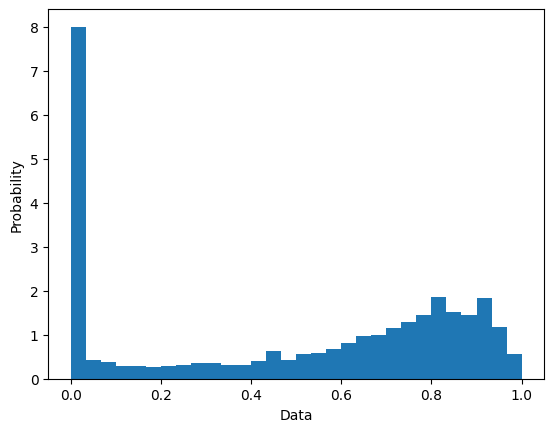

In [19]:
import matplotlib.pyplot as plt
# lista = df.results.to_list()
lista = df.old_results.to_list()
datos = [x[0] for x in lista]
plt.hist(datos, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

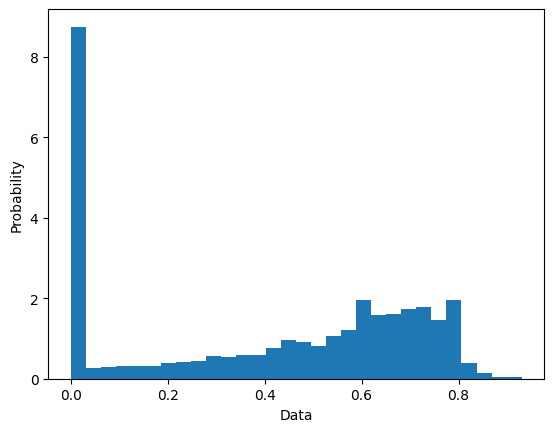

In [20]:
lista = df.old_results.to_list()
datos = [x[0] for x in lista]
plt.hist(datos, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [ ]:

df = pd.DataFrame(columns=["id", "results", "text", "language", "old_score", "old_results"])

for document in documents:
    result = scorer.score_document(ref_lang="spa", ref_script="latn", lang_segments=document["seg_langs"], document_text=document["text"], doc_id=document["id"], raw_score=False)
    df.loc[df.shape[0]] = [document["id"], result, document["text"], result[2], document["doc_scores"][0]/10, [x/10 for x in document["doc_scores"]]]


df["WDS"] = df.apply(lambda x: f"{round(x['results'][0], 2)}/{round(x['old_results'][0], 2)}", axis=1)
df["language"] = df.apply(lambda x: f"{x['results'][1]}/{x['old_results'][1]}", axis=1)
df["urls"] = df.apply(lambda x: f"{x['results'][2]}/{x['old_results'][2]}", axis=1)
df["punct"] = df.apply(lambda x: f"{x['results'][3]}/{x['old_results'][3]}", axis=1)
df["sing_chars"] = df.apply(lambda x: f"{x['results'][4]}/{x['old_results'][4]}", axis=1)
df["numbers"] = df.apply(lambda x: f"{x['results'][5]}/{x['old_results'][5]}", axis=1)
df["repet_seg"] = df.apply(lambda x: f"{x['results'][6]}/{x['old_results'][6]}", axis=1)
df["many_long"] = df.apply(lambda x: f"{x['results'][7]}/{x['old_results'][7]}", axis=1)
df["very_long"] = df.apply(lambda x: f"{x['results'][8]}/{x['old_results'][8]}", axis=1)
df["compression"] = df.apply(lambda x: f"{x['results'][9]}/{x['old_results'][9]}", axis=1)
df["short_seg"] = df.apply(lambda x: f"{x['results'][10]}/NaN", axis=1)

df_

In [ ]:



# print("nuevo:",x.score)
# print("viejo:",x.old_score)
# print(f"lang: {x.results[1]} {x.old_results[1]}\turl: {x.results[2]} {x.old_results[2]}\tpunct: {x.results[3]} {x.old_results[3]}")
# print(f"emoji: {x.results[4]} {x.old_results[4]}\tnumbe: {x.results[5]} {x.old_results[5]}\trep_seg: {x.results[6]} {x.old_results[6]}")
# print(f"long: {x.results[7]} {x.old_results[7]}\tvery_long: {x.results[8]} {x.old_results[8]}\tinfo: {x.results[9]} {x.old_results[9]}\tshort: {x.results[10]} X")
# print()
# print(x.text)

In [ ]:
df.iloc[5]

In [9]:
scorer._extract_features("banana၊\nplatano။")

{'word_chars': [7, 8],
 'punctuation_chars': [0, 0],
 'singular_chars': [0, 0],
 'numbers': [0, 0]}

In [15]:
def exponent(subscore, subscores, alpha, beta=3):
    a = subscore**-alpha    
    b = sum([x**-alpha for x in subscores])
    return a/b*beta

In [16]:
import math
penalty_scores = [1,1,0.97,1,1,1,1]
P = math.prod([x**exponent(x, penalty_scores, 2.9) for x in penalty_scores])

In [17]:
P

0.9860247644543972